# Algorithm Training, Testing, and Validation

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

In [3]:
# load clean dataset
cleaned_df = pd.read_csv('../dataset/manila-solcast-clean.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,2018-12-31,12,2018-12-31,24.590000,55.840000,93.600000,1000.780000,66.400000,7.910000,0.300000,152.200000,152.100000
1,2019-01-01,1,2019-01-01,25.133333,49.125000,88.500000,1001.458333,71.500000,7.108333,113.166667,264.833333,204.666667
2,2019-01-02,1,2019-01-02,25.975000,41.666667,82.416667,1002.083333,67.750000,7.908333,462.250000,414.500000,147.083333
3,2019-01-03,1,2019-01-03,25.500000,46.783333,87.750000,1003.291667,69.416667,6.958333,153.250000,281.000000,194.666667
4,2019-01-04,1,2019-01-04,26.516667,33.250000,73.666667,1004.208333,70.000000,8.108333,523.416667,438.833333,130.916667


In [4]:
# display column names
cleaned_df.columns

Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_GHI', 'Daily_radiation'],
      dtype='object')

In [5]:
# select features
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_GHI', 'Daily_radiation']]

In [6]:
# feature engineering of time series column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['Date'].dt.year
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['day'] = cleaned_df['Date'].dt.day

In [7]:
# display column names
cleaned_df.columns

Index(['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_GHI', 'Daily_radiation', 'year', 'month', 'day'],
      dtype='object')

In [8]:
# select features
cleaned_df = cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_GHI', 'Daily_radiation']]
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,12,31,24.590000,55.840000,93.600000,1000.780000,66.400000,7.910000,0.300000,152.200000,152.100000
1,1,1,25.133333,49.125000,88.500000,1001.458333,71.500000,7.108333,113.166667,264.833333,204.666667
2,1,2,25.975000,41.666667,82.416667,1002.083333,67.750000,7.908333,462.250000,414.500000,147.083333
3,1,3,25.500000,46.783333,87.750000,1003.291667,69.416667,6.958333,153.250000,281.000000,194.666667
4,1,4,26.516667,33.250000,73.666667,1004.208333,70.000000,8.108333,523.416667,438.833333,130.916667


## Model Training and Testing

In [9]:
# import libraries for algorithms training, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
# produces a 70%, 15%, 15% split for training, validation and test sets
train_data, validation_data, test_data = np.split(cleaned_df.sample(frac = 1), [int(.7 * len(cleaned_df)), int(.85 * len(cleaned_df))])

# convert dataframes to .csv and save locally
train_data.to_csv('../dataset/train.csv', header = True, index = False)
validation_data.to_csv('../dataset/validation.csv', header=True, index = False)
test_data.to_csv('../dataset/test.csv', header = True, index = False)

In [11]:
# training data
train_df = pd.read_csv('../dataset/train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv('../dataset/test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

In [12]:
# setup the pipeline steps for linear regression
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]

# create the pipeline
pipeline_lr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [13]:
# evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score: ', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score:  0.8651901260152943
Root Mean Squared Error: 4.29
Root Mean Absolute Error: 3.91


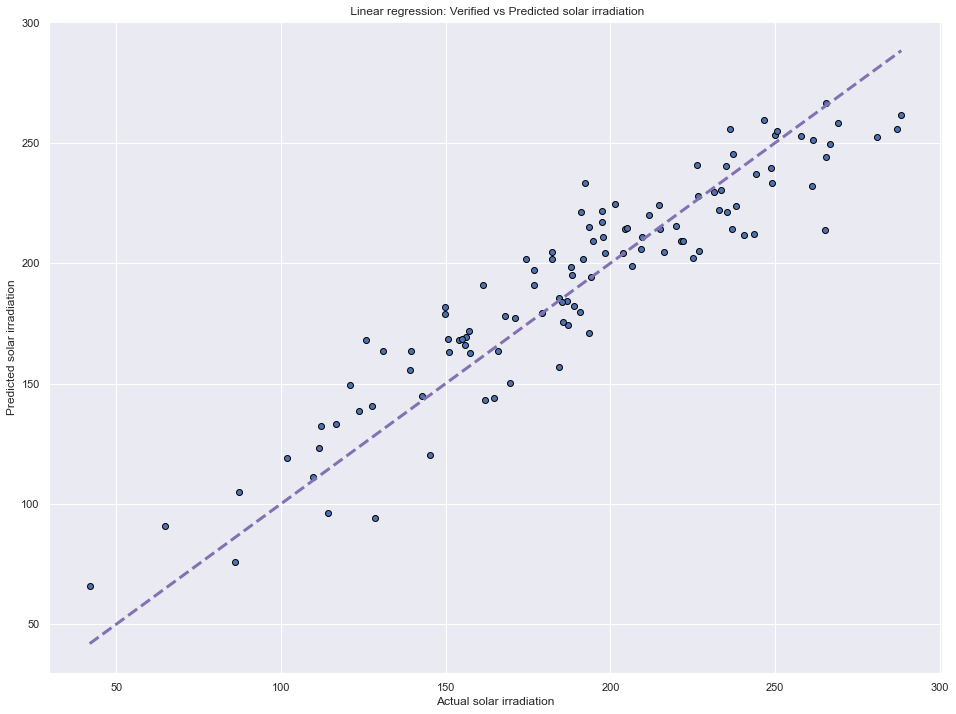

In [14]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.show() 

e:\Justin\Documents\Omdena\omdena-mlops\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


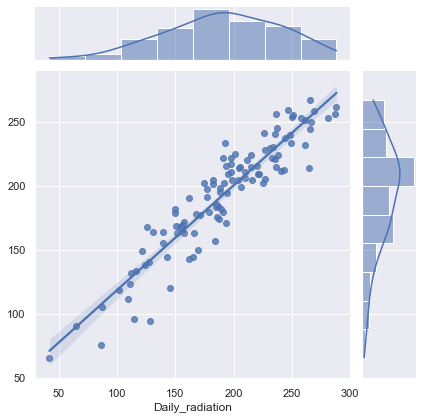

In [15]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.show()

### Random Forest Regressor

In [17]:
# setup the pipeline steps for random forest: steps

steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]

# create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [18]:
# evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score: ', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score:  0.8931557786260766
Root Mean Squared Error: 4.05
Root Mean Absolute Error: 3.60


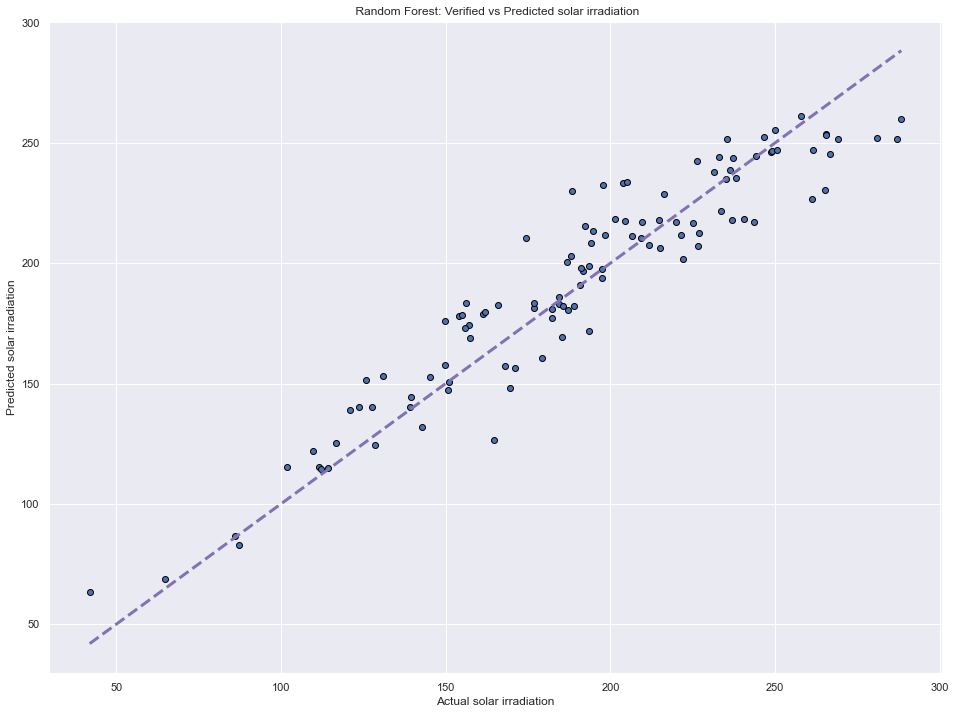

In [19]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

e:\Justin\Documents\Omdena\omdena-mlops\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


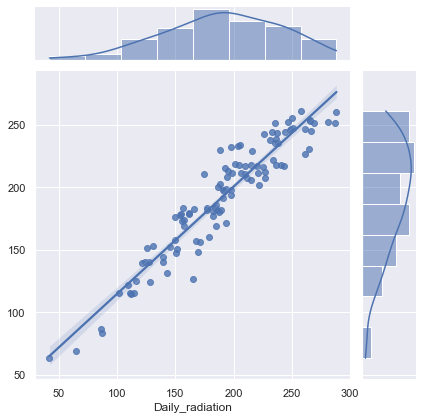

In [20]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.show()

### GradientBoosting Regressor

In [21]:
# setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]

# create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

In [22]:
# evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score: ', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score:  0.90767201152502
Root Mean Squared Error: 3.90
Root Mean Absolute Error: 3.46


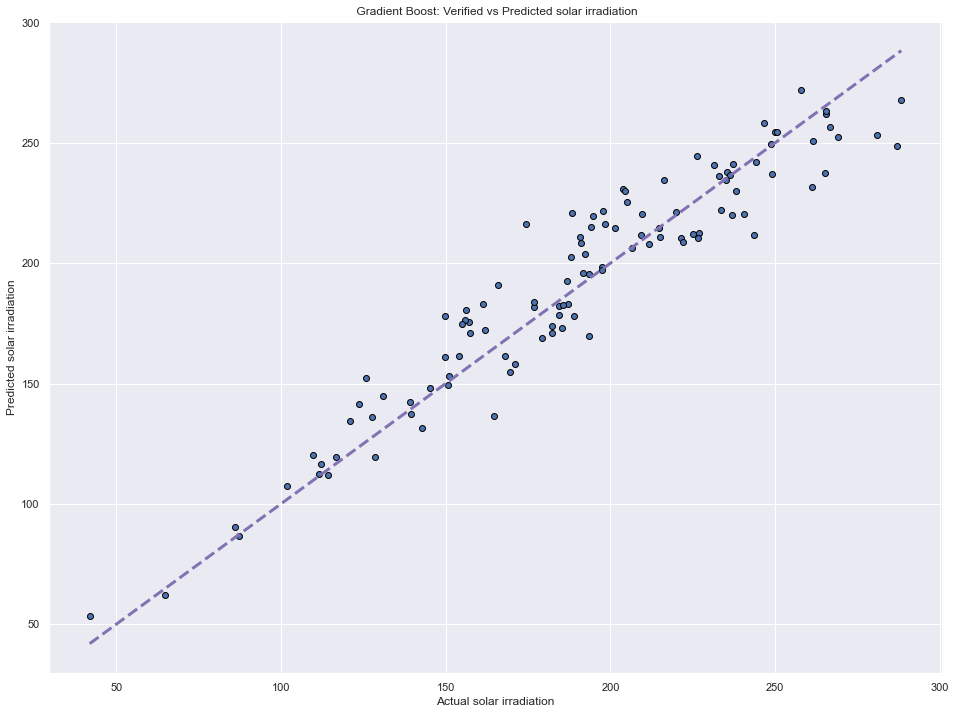

In [23]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

e:\Justin\Documents\Omdena\omdena-mlops\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


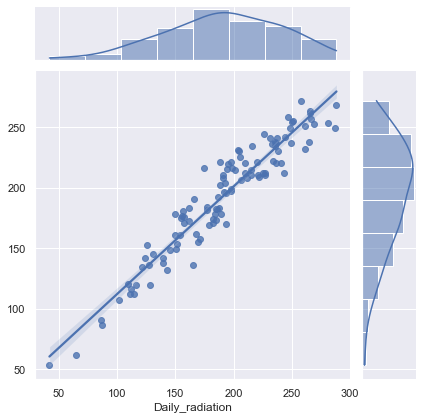

In [24]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.show()

## Model Validation

In [25]:
# validation data
val_df = pd.read_csv('../dataset/validation.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [26]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = pipeline_rfr.predict(X_val)
y_val_gbr = pipeline_gbr.predict(X_val)

In [27]:
# evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)

mae_lr_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score: ', r2_score(y_val, y_val_lr))

print('Linear Regression - Root Mean Squared Error: %.2f' % np.sqrt(mse_lr_val))

print('Linear Regression - Root Mean Absolute Error: %.2f' % np.sqrt(mse_lr_val))

r2_score:  0.8720084477649866
Linear Regression - Root Mean Squared Error: 4.19
Linear Regression - Root Mean Absolute Error: 4.19


In [28]:
# evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)

mae_rf_val = mean_absolute_error(y_val, y_val_rfr)

print('r2_score: ', r2_score(y_val, y_val_rfr))

print('Random Forest - Root Mean Squared Error: %.2f' % np.sqrt(mse_rf_val))

print('Random Forest - Root Mean Absolute Error: %.2f' % np.sqrt(mse_rf_val))

r2_score:  0.8809483627465755
Random Forest - Root Mean Squared Error: 4.12
Random Forest - Root Mean Absolute Error: 4.12


In [29]:
# evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)

mae_gbr_val = mean_absolute_error(y_val, y_val_gbr)

print('r2_score: ', r2_score(y_val, y_val_gbr))

print('Gradient Boost - Root Mean Squared Error: %.2f' % np.sqrt(mse_gbr_val))

print('Gradient Boost - Root Mean Absolute Error: %.2f' % np.sqrt(mae_gbr_val))

r2_score:  0.8815157188958439
Gradient Boost - Root Mean Squared Error: 4.11
Gradient Boost - Root Mean Absolute Error: 3.48
